# Imports

In [1]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'mxnet'

# Load Images:

In [37]:
image = mx.image.imread("./ss.jpg")
print("Shape: ",image.shape)
print("Data Type: ",image.dtype)
print("Minimum value: ",image.min().asscalar())
print("Maximum value: ",image.max().asscalar())

Shape:  (1600, 903, 3)
Data Type:  <class 'numpy.uint8'>
Minimum value:  0
Maximum value:  255


# Visualize Image

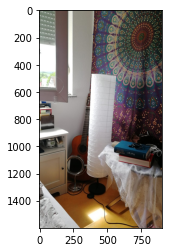

In [38]:
plt.imshow(image.asnumpy())

# Transform Image

In [39]:
from mxnet.gluon.data.vision import transforms

transform_fn = transforms.Compose([transforms.ToTensor(),   # HWC to CHW
                                  transforms.Normalize([.485,.456,.406],[.229,.224,.225])])



In [40]:
image = transform_fn(image)
print("Shape: ",image.shape)
print("Data Type: ",image.dtype)
print("Minimum value: ",image.min().asscalar())
print("Maximum value: ",image.max().asscalar())

Shape:  (3, 1600, 903)
Data Type:  <class 'numpy.float32'>
Minimum value:  -2.117904
Maximum value:  2.64


# Batch Image

In [41]:
image = image.expand_dims(0)
print(image.shape)

(1, 3, 1600, 903)


# Load Model

In [42]:
network = gcv.model_zoo.get_model("fcn_resnet50_ade",pretrained=True)

In [43]:
!ls -sh /home/ec2-user/.mxnet/models/fcn_resnet50_ade*.params

ls: cannot access '/home/ec2-user/.mxnet/models/fcn_resnet50_ade*.params': No such file or directory


# Make Prediction

In [44]:
output = network.demo(image)
print(output.shape)

(1, 150, 1600, 903)


/home/ubuntu/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/gluoncv/model_zoo/segbase.py:102: UserWarning: demo method will be deprecated in favor of predict.
  warnings.warn('demo method will be deprecated in favor of predict.')


In [45]:
output = output[0]
print(output.shape)

(150, 1600, 903)


# Closer Look Pixel slice

In [46]:
px_height,px_width = 300,500


In [47]:
px_logit = output[:,px_height,px_width]

In [48]:
px_probability = mx.nd.softmax(px_logit)
px_rounded_probability = mx.nd.round(px_probability*100)/100
print(px_rounded_probability)


[0.58 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.
 0.   0.   0.   0.   0.2  0.   0.   0.   0.02 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.12 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
<NDArray 150 @cpu(0)>


In [49]:
class_index = mx.nd.argmax(px_logit,axis =0 )
class_index = class_index[0].astype('int').asscalar()
print(class_index)

0


In [50]:
from gluoncv.data.ade20k.segmentation import ADE20KSegmentation

In [51]:
class_label = ADE20KSegmentation.CLASSES[class_index]
print(class_label)

wall


In [52]:
output_proba = mx.nd.softmax(output,axis =0)

In [53]:
output_heatmap = output_proba[127]
# 

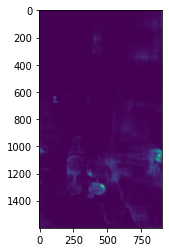

In [54]:
plt.imshow(output_heatmap.asnumpy())

# Visualize most likely class

In [55]:
prediction = mx.nd.argmax(output, 0 ).asnumpy()
print(prediction.shape)

(1600, 903)


In [56]:
print(prediction)

[[ 8.  8.  8. ...  0.  0.  0.]
 [ 8.  8.  8. ...  0.  0.  0.]
 [ 8.  8.  8. ...  0.  0.  0.]
 ...
 [ 7.  7. 16. ...  0.  0.  0.]
 [ 7. 16. 16. ...  0.  0.  0.]
 [16. 16. 16. ...  0.  0.  0.]]


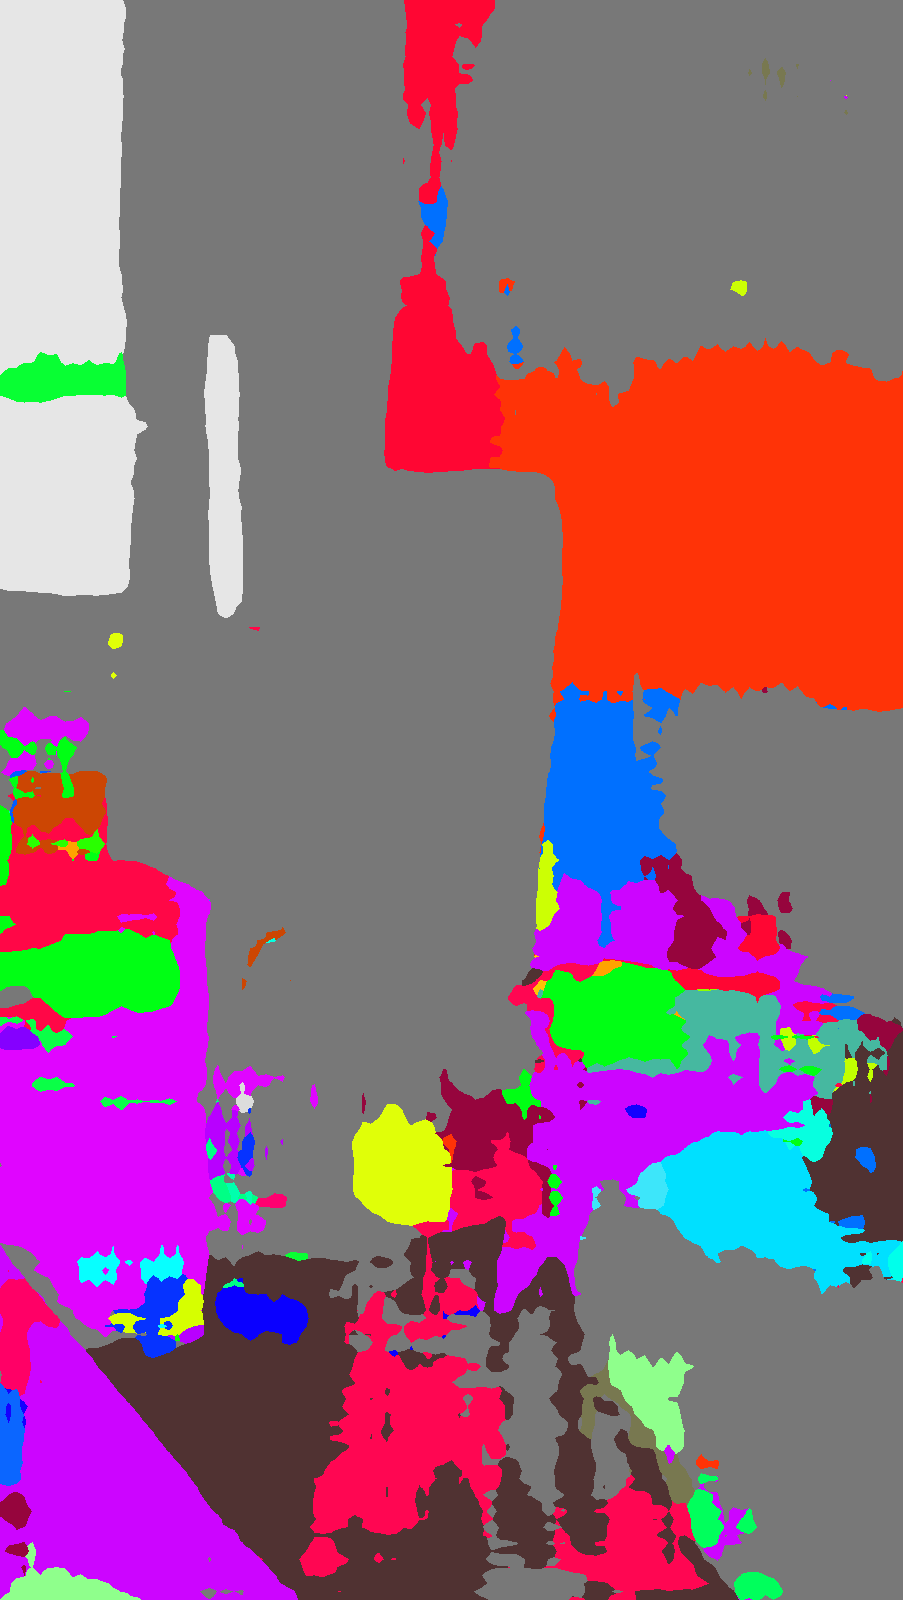

In [57]:
from gluoncv.utils.viz import get_color_pallete

prediction_image = get_color_pallete(prediction,'ade20k')
prediction_image

# EXIT